In [1]:
import scanpy as sc
import pandas as pd
import os
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
rss = pd.read_csv('../data/mpp-rss.csv', index_col='Unnamed: 0').transpose()

In [3]:
adata = sc.read('../data/20210706_Preprocessed_CellCycle_Regressed_IncreasedDepth.h5ad')
adata = adata[adata.obs['Cell Types'] == 'HSC/MPP']
adata.uns['Sample_colors'] = ['#008080', '#00bfff', '#daa520', '#8F00FF']

/home/matt/anaconda3/envs/scrna-iqcell/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.uns` of view, copying.


In [8]:
auc = pd.read_csv('./data/mpp-auc-mtx.csv', index_col=0)
for x in auc.columns:
    adata.obs[x] = auc[x]

# Comparison of DLL4 vs Uncoated

In [6]:
rss['DLL4 - Uncoated'] = rss['DLL4'] - rss['Uncoated']

In [7]:
x = rss.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dvu_normalize = pd.DataFrame(x_scaled, columns=rss.columns, index=rss.index)
rss['DLL4 - Uncoated (Normalized)'] = dvu_normalize['DLL4'] - dvu_normalize['Uncoated']

In [8]:
rss.sort_values(by='DLL4 - Uncoated (Normalized)', inplace=True, ascending=False)
num_regs = 10
regs = [x for x in rss.index[0:num_regs]] + [i for i in rss.index[(len(rss.index)-num_regs):]]

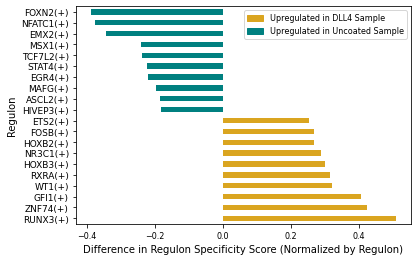

In [10]:
# DLL4 vs Uncoated
colors = ['goldenrod'] * num_regs + ['teal'] * num_regs
rss_regs = rss[rss.index.isin(regs)]
rss_plot = rss_regs.plot(kind='barh', y='DLL4 - Uncoated (Normalized)', color=colors)
plt.ylabel('Regulon')
plt.xlabel('Difference in Regulon Specificity Score (Normalized by Regulon)')
colors1 = {'Upregulated in DLL4 Sample': 'goldenrod',
          'Upregulated in Uncoated Sample': 'teal'}
labels = list(colors1.keys())
handles = [plt.Rectangle((0, 0), 1, 1, color=colors1[label]) for label in labels]
plt.legend(handles, labels, fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=9)
plt.show()

# Comparison of DLL4-VCAM1 vs Uncoated

In [11]:
rss['DLL4+VCAM1 - Uncoated'] = rss['DLL4_VCAM1'] - rss['Uncoated']

In [12]:
rss.sort_values(by='DLL4+VCAM1 - Uncoated', inplace=True, ascending=False)

In [13]:
x = rss.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dvvu_normalize = pd.DataFrame(x_scaled, columns=rss.columns, index=rss.index)
rss['DLL4+VCAM1 - Uncoated (Normalized)'] = dvvu_normalize['DLL4_VCAM1'] - dvvu_normalize['Uncoated']

In [14]:
col = 'DLL4+VCAM1 - Uncoated (Normalized)'

In [15]:
rss.sort_values(by=col, inplace=True, ascending=False)

In [16]:
num_regs = 10
regs = [x for x in rss.index[0:num_regs]] + [i for i in rss.index[(len(rss.index)-num_regs):]]

In [17]:
x = rss.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dvvu_normalize = pd.DataFrame(x_scaled, columns=rss.columns, index=rss.index)
rss[col] = dvvu_normalize['DLL4_VCAM1'] - dvvu_normalize['Uncoated']

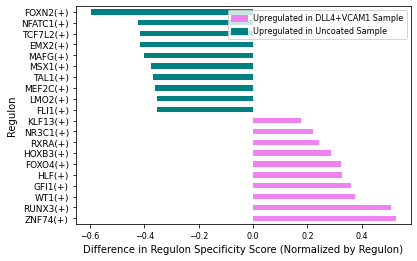

In [19]:
# DLL4 VCAM1 vs Uncoated
rss.sort_values(by=col, inplace=True, ascending=False)
colors = ['violet'] * num_regs + ['teal'] * num_regs
rss_regs = rss[rss.index.isin(regs)]
rss_plot = rss_regs.plot(kind='barh', y=col, color=colors)
plt.ylabel('Regulon')
plt.xlabel('Difference in Regulon Specificity Score (Normalized by Regulon)')
colors1 = {'Upregulated in DLL4+VCAM1 Sample': 'violet',
          'Upregulated in Uncoated Sample': 'teal'}
labels = list(colors1.keys())
handles = [plt.Rectangle((0, 0), 1, 1, color=colors1[label]) for label in labels]
plt.legend(handles, labels, fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=9)
plt.show()

# Comparison of DLL4+VCAM1 and DLL4

In [20]:
rss['DLL4+VCAM1 - DLL4'] = rss['DLL4_VCAM1'] - rss['DLL4']
rss.sort_values(by='DLL4+VCAM1 - DLL4', inplace=True, ascending=False)

In [21]:
x = rss.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dvvd_normalize = pd.DataFrame(x_scaled, columns=rss.columns, index=rss.index)
rss['DLL4+VCAM1 - DLL4 (Normalized)'] = dvvd_normalize['DLL4_VCAM1'] - dvvd_normalize['DLL4']

In [22]:
col = 'DLL4+VCAM1 - DLL4 (Normalized)'

In [23]:
rss.sort_values(by=col, inplace=True, ascending=False)
num_regs = 10
regs = [x for x in rss.index[0:num_regs]] + [i for i in rss.index[(len(rss.index)-num_regs):]]

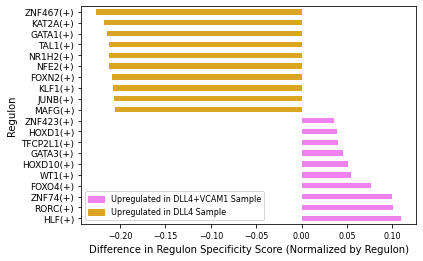

In [25]:
# DLL4 VCAM1 vs DLL4
rss.sort_values(by=col, inplace=True, ascending=False)
colors = ['violet'] * num_regs + ['goldenrod'] * num_regs
rss_regs = rss[rss.index.isin(regs)]
rss_plot = rss_regs.plot(kind='barh', y=col, color=colors)
plt.ylabel('Regulon')
plt.xlabel('Difference in Regulon Specificity Score (Normalized by Regulon)')
colors1 = {'Upregulated in DLL4+VCAM1 Sample': 'violet',
          'Upregulated in DLL4 Sample': 'goldenrod'}
labels = list(colors1.keys())
handles = [plt.Rectangle((0, 0), 1, 1, color=colors1[label]) for label in labels]
plt.legend(handles, labels, fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=9)
plt.show()